# Bibliotecas

In [99]:
import pandas as pd
from pysal.explore import esda
from pysal.lib import weights
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from splot.esda import lisa_cluster
import matplotlib.patches as mpatches
import libpysal
from esda import Moran
from esda.moran import Moran_BV, Moran_Local_BV

# Análise Univariada 

### Degradação Ambiental

In [5]:
data = pd.read_excel("degradacao_mun.xlsx")
data.head()

,CD_MUN,NM_MUN,AREA__ MUN_KM2,degradacao_2002,degradacao_2012,degradacao_2022,Área plantada ou destinada à colheita_2002,Área plantada ou destinada à colheita_2012,Área plantada ou destinada à colheita_2022,Valor da produção (Mil Reais)_2002,Valor da produção (Mil Reais)_2012,Valor da produção (Mil Reais)_2022
0,2901403,Angical,153005,90894.603008,95665.836343,91826.456040,19942,6436,2924,42713,3074,13170
1,1700251,Abreulândia,1906295,145557.632919,127888.495282,102188.771220,366,205,12782,203,195,94520
2,2902500,Baianópolis,3320723,289746.010963,272392.804838,229143.031254,19965,20413,23572,21377,27570,279714
3,1700301,Aguiarnópolis,236792,13862.056623,12539.095526,11744.825482,1113,154,410,837,246,8546
4,2903201,Barreiras,8051274,544996.165639,484645.676416,409683.895873,172664,203174,260752,221856,859148,3416596


In [3]:
shapefile = gpd.read_file('MATOPIBA.shx')
shapefile.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,layer,path,geometry
0,2901403,Angical,BA,1530.050,BA_Municipios_2022,C:/Users/Phillipe/Downloads/BA_Municipios_2022...,"POLYGON ((-44.38563 -12.04073, -44.34854 -12.0..."
1,2902500,Baianópolis,BA,3320.723,BA_Municipios_2022,C:/Users/Phillipe/Downloads/BA_Municipios_2022...,"POLYGON ((-44.55035 -12.94304, -44.55059 -12.9..."
2,2903201,Barreiras,BA,8051.274,BA_Municipios_2022,C:/Users/Phillipe/Downloads/BA_Municipios_2022...,"POLYGON ((-44.71119 -12.14178, -44.71035 -12.1..."
3,2903904,Bom Jesus da Lapa,BA,4115.510,BA_Municipios_2022,C:/Users/Phillipe/Downloads/BA_Municipios_2022...,"POLYGON ((-42.95086 -13.29394, -42.95123 -13.2..."
4,2904407,Brejolândia,BA,2247.208,BA_Municipios_2022,C:/Users/Phillipe/Downloads/BA_Municipios_2022...,"POLYGON ((-43.45975 -12.56631, -43.45996 -12.5..."


In [6]:
data['NM_MUN'] = data['NM_MUN'].str.upper()
shapefile['NM_MUN'] = shapefile['NM_MUN'].str.upper()

# Join with shapefile based on city name
data_with_geometry = data.merge(shapefile, left_on="NM_MUN", right_on="NM_MUN", how="inner")

# Convert pandas DataFrame to GeoDataFrame 
gdf = gpd.GeoDataFrame(data_with_geometry)

gdf.head()

,CD_MUN_x,NM_MUN,AREA__ MUN_KM2,degradacao_2002,degradacao_2012,degradacao_2022,Área plantada ou destinada à colheita_2002,Área plantada ou destinada à colheita_2012,Área plantada ou destinada à colheita_2022,Valor da produção (Mil Reais)_2002,Valor da produção (Mil Reais)_2012,Valor da produção (Mil Reais)_2022,CD_MUN_y,SIGLA_UF,AREA_KM2,layer,path,geometry
0,2901403,ANGICAL,153005,90894.603008,95665.836343,91826.456040,19942,6436,2924,42713,3074,13170,2901403,BA,1530.050,BA_Municipios_2022,C:/Users/Phillipe/Downloads/BA_Municipios_2022...,"POLYGON ((-44.38563 -12.04073, -44.34854 -12.0..."
1,1700251,ABREULÂNDIA,1906295,145557.632919,127888.495282,102188.771220,366,205,12782,203,195,94520,1700251,TO,1906.295,TO_Municipios_2022,C:/Users/Phillipe/Downloads/TO_Municipios_2022...,"POLYGON ((-49.17084 -9.74152, -49.17094 -9.741..."
2,2902500,BAIANÓPOLIS,3320723,289746.010963,272392.804838,229143.031254,19965,20413,23572,21377,27570,279714,2902500,BA,3320.723,BA_Municipios_2022,C:/Users/Phillipe/Downloads/BA_Municipios_2022...,"POLYGON ((-44.55035 -12.94304, -44.55059 -12.9..."
3,1700301,AGUIARNÓPOLIS,236792,13862.056623,12539.095526,11744.825482,1113,154,410,837,246,8546,1700301,TO,236.792,TO_Municipios_2022,C:/Users/Phillipe/Downloads/TO_Municipios_2022...,"POLYGON ((-47.45877 -6.54768, -47.45887 -6.552..."
4,2903201,BARREIRAS,8051274,544996.165639,484645.676416,409683.895873,172664,203174,260752,221856,859148,3416596,2903201,BA,8051.274,BA_Municipios_2022,C:/Users/Phillipe/Downloads/BA_Municipios_2022...,"POLYGON ((-44.71119 -12.14178, -44.71035 -12.1..."


In [19]:
# Criar a matriz de pesos espaciais do tipo KNN com k=4
w = libpysal.weights.KNN.from_dataframe(gdf, k=4)

# Calcular a autocorrelação espacial (Moran's I) para degradacao_2002
moran_2002 = Moran(gdf['degradacao_2002'], w)
print(f"Moran's I for degradacao_2002: {moran_2002.I}, Expected I: {moran_2002.EI}, p-value: {moran_2002.p_sim}")

# Calcular a autocorrelação espacial (Moran's I) para degradacao_2012
moran_2012 = Moran(gdf['degradacao_2012'], w)
print(f"Moran's I for degradacao_2012: {moran_2012.I}, Expected I: {moran_2012.EI}, p-value: {moran_2012.p_sim}")

# Calcular a autocorrelação espacial (Moran's I) para degradacao_2022
moran_2022 = Moran(gdf['degradacao_2022'], w)
print(f"Moran's I for degradacao_2022: {moran_2022.I}, Expected I: {moran_2022.EI}, p-value: {moran_2022.p_sim}")

Moran's I for degradacao_2002: 0.36621647596785595, Expected I: -0.0029239766081871343, p-value: 0.001
Moran's I for degradacao_2012: 0.36044470480004703, Expected I: -0.0029239766081871343, p-value: 0.001
Moran's I for degradacao_2022: 0.3561878996689652, Expected I: -0.0029239766081871343, p-value: 0.001


Moran's I for 2002: 0.36621647596785595, Expected I: -0.0029239766081871343, p-value: 0.001
Moran's I for 2012: 0.36044470480004703, Expected I: -0.0029239766081871343, p-value: 0.001
Moran's I for 2022: 0.3561878996689652, Expected I: -0.0029239766081871343, p-value: 0.001


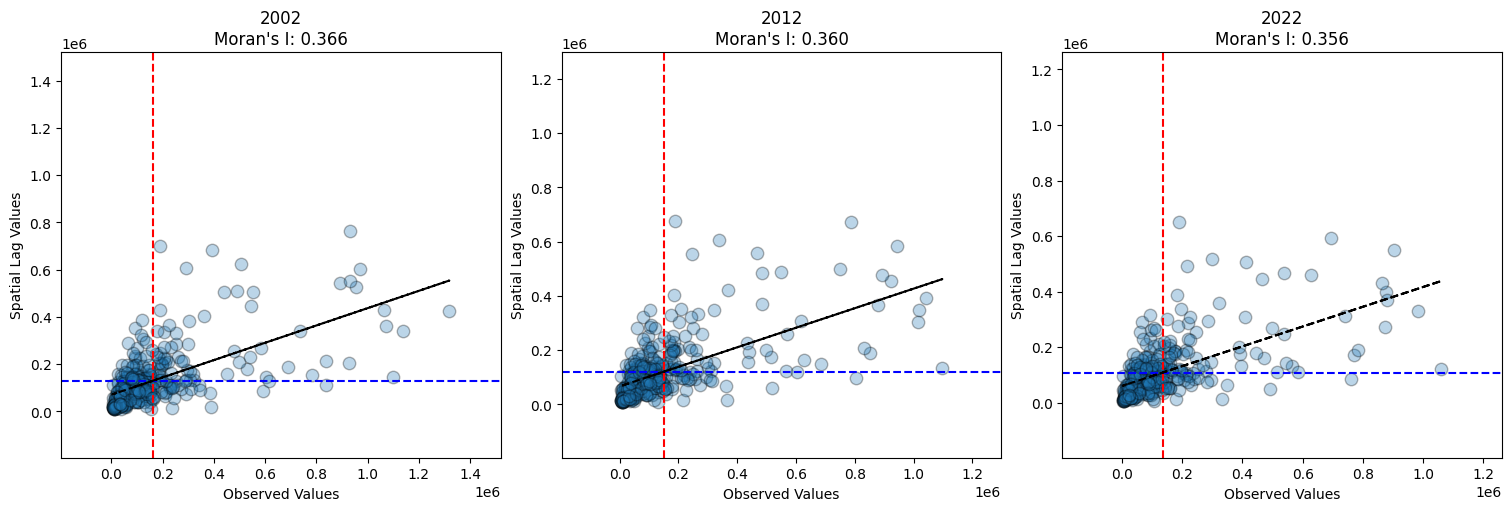

In [53]:
# Criar a matriz de pesos espaciais do tipo KNN com k=4
w = weights.KNN.from_dataframe(gdf, k=4)

# Função para criar o gráfico de dispersão
def plot_moran_scatter(ax, year, column):
    # Calcular a autocorrelação espacial (Moran's I) para o ano especificado
    moran = Moran(gdf[column], w)
    print(f"Moran's I for {year}: {moran.I}, Expected I: {moran.EI}, p-value: {moran.p_sim}")

    # Obter valores defasados espacialmente (lag)
    ylag = weights.lag_spatial(w, gdf[column])

    # Gráfico de dispersão
    sc = ax.scatter(moran.y, ylag, alpha=0.3, edgecolor='k', s=80)

    # Adicionar linhas horizontais e verticais para distinguir a média observada e a média de Moran's I
    ax.axvline(x=moran.y.mean(), color='r', linestyle='--')
    ax.axhline(y=ylag.mean(), color='b', linestyle='--')

    # Ajustar um modelo linear aos dados
    coefficients = np.polyfit(moran.y, ylag, 1)
    poly_fit = np.poly1d(coefficients)
    ax.plot(moran.y, poly_fit(moran.y), color='black', linestyle='--')

    # Ajustar os limites dos eixos com base nos dados
    xlim = [min(moran.y.min(), ylag.min()) - 200000, max(moran.y.max(), ylag.max()) + 200000]
    ylim = [min(moran.y.min(), ylag.min()) - 200000, max(moran.y.max(), ylag.max()) + 200000]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # Adicionar títulos e rótulos aos eixos
    ax.set_title(f'{year}\nMoran\'s I: {moran.I:.3f}')
    ax.set_xlabel('Observed Values')
    ax.set_ylabel('Spatial Lag Values')

# Criar subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

# Plotar gráficos para 2002, 2012 e 2022
plot_moran_scatter(axs[0], 2002, 'degradacao_2002')
plot_moran_scatter(axs[1], 2012, 'degradacao_2012')
plot_moran_scatter(axs[2], 2022, 'degradacao_2022')

# Mostrar o gráfico
plt.show()

## Análise do Gráfico de Dispersão - Degradação Ambiental: 2002, 2012 e 2022

### 1. Moran's I e Autocorrelação Espacial Positiva

O Índice de Moran's I para os três anos é positivo e significativo, indicando autocorrelação espacial positiva na degradação ambiental:

- **2002:** Moran's I = 0.366
- **2012:** Moran's I = 0.360
- **2022:** Moran's I = 0.356

Áreas com alta degradação tendem a estar próximas de outras áreas com alta degradação, e áreas com baixa degradação tendem a estar próximas de outras áreas com baixa degradação. Isso sugere uma tendência de agrupamento espacial na degradação ambiental.

### 2. Mudanças ao Longo do Tempo

Embora os valores do Índice de Moran's I tenham diminuído ligeiramente de 2002 para 2022, a presença de autocorrelação espacial positiva permanece consistente. Isso sugere que a degradação ambiental tem um padrão espacial robusto e persistente.

- **2002 vs. 2012:** Estabilidade na autocorrelação espacial.
- **2012 vs. 2022:** Leve diminuição no Índice de Moran's I, indicando uma leve redução na força da autocorrelação espacial.

### 3. Conclusões

- **Autocorrelação Espacial Positiva:** Consistente ao longo dos anos.
- **Estabilidade Temporal:** A relação espacial na degradação ambiental mostra pouca variação ao longo dos anos.
- **Implicações para Políticas:** Áreas HH podem ser prioritárias para intervenções políticas visando reduzir a degradação ambiental.


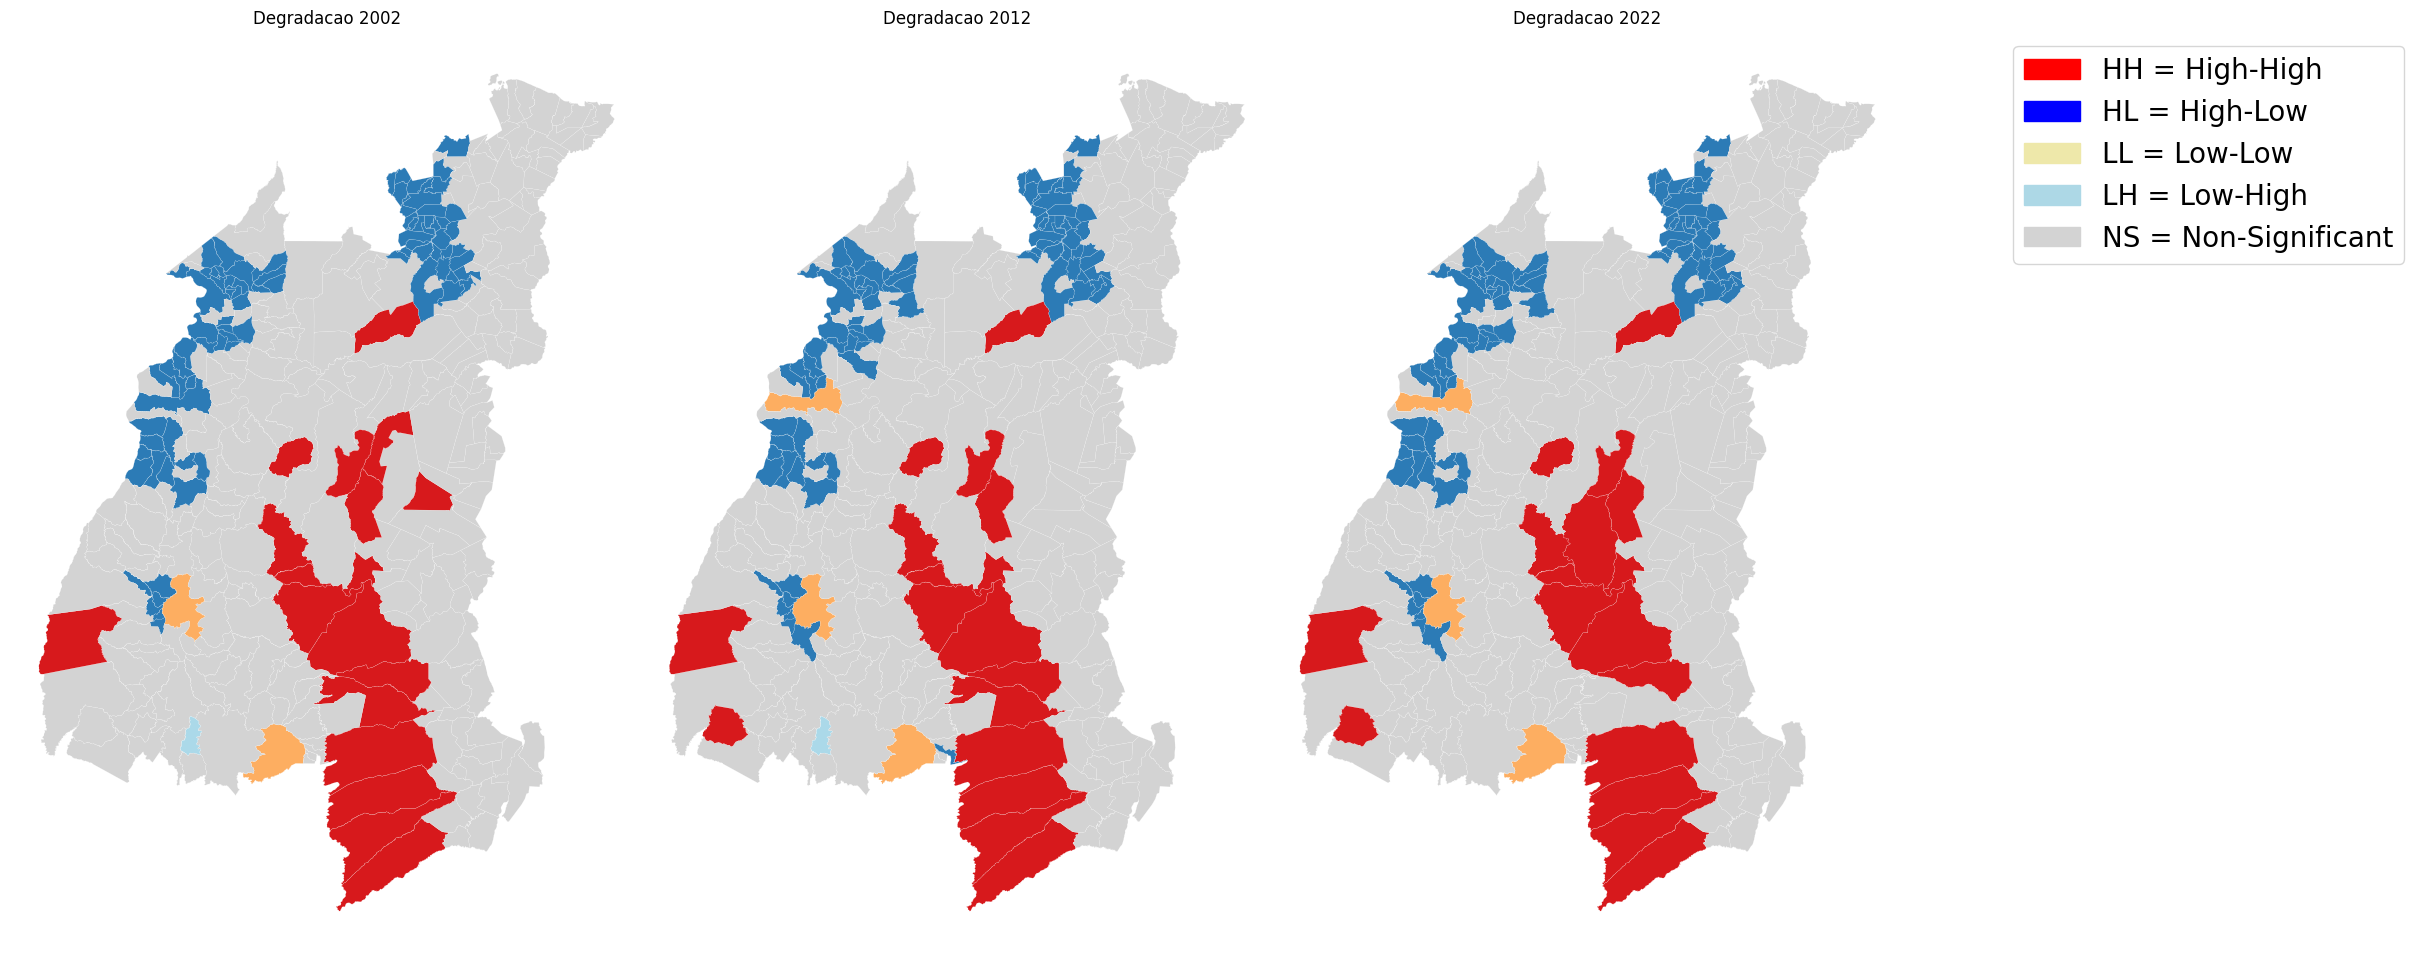

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(24, 10))  # Change the figure size here

# calculating Local Moran's I and plotting LISA cluster map for 'degradacao_2002'
w = weights.KNN.from_dataframe(gdf, k=4)
lisa = esda.Moran_Local(gdf['degradacao_2002'], w)
lisa_cluster(lisa, gdf, ax=axs[0], legend=False)
axs[0].set_title('Degradacao 2002')

# calculating Local Moran's I and plotting LISA cluster map for 'degradacao_2012'
w = weights.KNN.from_dataframe(gdf, k=4)
lisa = esda.Moran_Local(gdf['degradacao_2012'], w)
lisa_cluster(lisa, gdf, ax=axs[1], legend=False)
axs[1].set_title('Degradacao 2012')

# calculating Local Moran's I and plotting LISA cluster map for 'degradacao_2022'
w = weights.KNN.from_dataframe(gdf, k=4)
lisa = esda.Moran_Local(gdf['degradacao_2022'], w)
lisa_cluster(lisa, gdf, ax=axs[2])
axs[2].set_title('Degradacao 2022')

# Create legend manually
hh_patch = mpatches.Patch(color='red', label='HH = High-High')  
hl_patch = mpatches.Patch(color='blue', label='HL = High-Low')  
ll_patch = mpatches.Patch(color='palegoldenrod', label='LL = Low-Low')  
lh_patch = mpatches.Patch(color='lightblue', label='LH = Low-High')  
ns_patch = mpatches.Patch(color='lightgray', label='NS = Non-Significant')  

plt.legend(handles=[hh_patch, hl_patch, ll_patch, lh_patch, ns_patch], 
           loc='upper left', bbox_to_anchor=(1.15, 1), fontsize=20)
plt.tight_layout()
plt.show()


## Análise da Degradação Ambiental: 2002, 2012 e 2022

### 1. Mapa LISA

Os mapas LISA visualizam a autocorrelação espacial local, classificando as áreas em clusters significativos:

- **HH (High-High):** Alta degradação próxima de alta degradação.
- **LL (Low-Low):** Baixa degradação próxima de baixa degradação.
- **HL (High-Low):** Alta degradação próxima de baixa degradação.
- **LH (Low-High):** Baixa degradação próxima de alta degradação.
- **NS (Non-Significant):** Autocorrelação espacial não significativa.

### 2. Observações Detalhadas

- **2002**
  - **Gráfico de Dispersão:** Moran's I = 0.366
  - **Mapa LISA:** Áreas HH concentradas no centro e sul; áreas LL no norte e oeste.
  
- **2012**
  - **Gráfico de Dispersão:** Moran's I = 0.360
  - **Mapa LISA:** Distribuição similar a 2002 com algumas mudanças na intensidade.
  
- **2022**
  - **Gráfico de Dispersão:** Moran's I = 0.356
  - **Mapa LISA:** Distribuição consistente com anos anteriores, algumas expansões nas áreas HH.

### 3. Conclusões Detalhadas

- **Consistência na Autocorrelação Espacial:** Tanto os gráficos de dispersão quanto os mapas LISA mostram uma consistência na autocorrelação espacial positiva da degradação ambiental ao longo dos anos.
- **Estabilidade nas Áreas Significativas:** As áreas HH e LL mantêm-se estáveis, sugerindo persistência espacial.
- **Mudanças Espaciais:** Pequenas mudanças na intensidade e localização das áreas HH e LL refletem dinâmicas locais.
- **Implicações para Políticas:** Áreas HH podem ser alvos prioritários para intervenções políticas, enquanto áreas LL devem ser monitoradas para prevenir degradação.


# Análise Bivariada 

### Degradação Ambiental x Área plantada ou destinada à colheita

Bivariate Moran's I for degradacao_2002 and Área plantada ou destinada à colheita_2002: 0.23226554793001533, p-value: 0.001
Bivariate Moran's I for degradacao_2012 and Área plantada ou destinada à colheita_2012: 0.2435314958184832, p-value: 0.001
Bivariate Moran's I for degradacao_2022 and Área plantada ou destinada à colheita_2022: 0.26009101144818453, p-value: 0.001


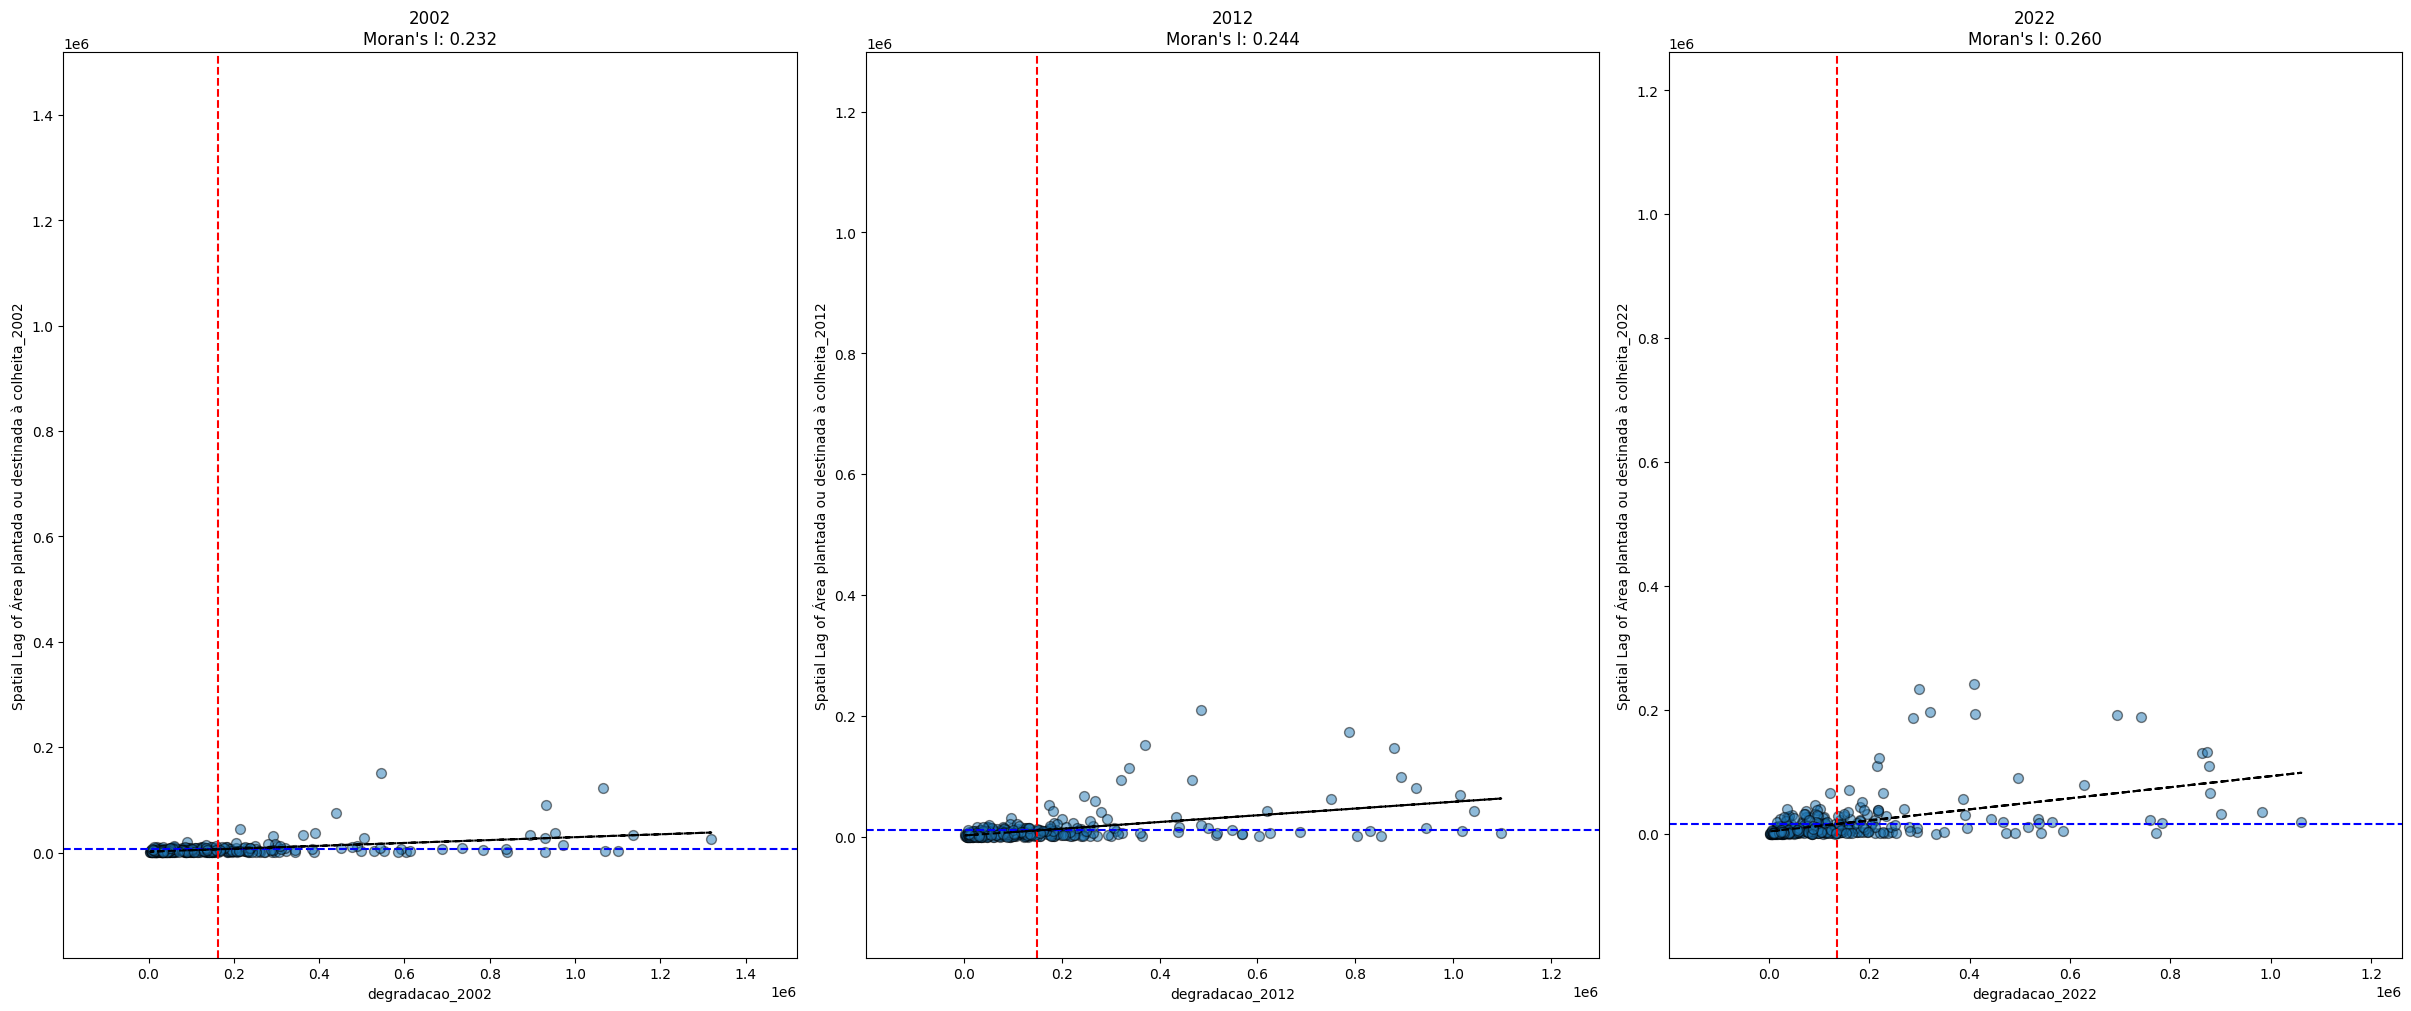

In [102]:
# Criar a matriz de pesos espaciais do tipo KNN com k=4
w = libpysal.weights.KNN.from_dataframe(gdf, k=4)

# Função para calcular e plotar o Índice de Moran Bivariado
def plot_bivariate_moran(ax, year, column1, column2):
    moran_bv = Moran_BV(gdf[column1], gdf[column2], w)
    print(f"Bivariate Moran's I for {column1} and {column2}: {moran_bv.I}, p-value: {moran_bv.p_sim}")

    # Obter valores defasados espacialmente (lag)
    ylag = libpysal.weights.lag_spatial(w, gdf[column2])

    # Gráfico de dispersão
    sc = ax.scatter(gdf[column1], ylag, alpha=0.5, edgecolor='k', s=50)

    # Adicionar linhas horizontais e verticais para distinguir a média observada e a média de Moran's I
    ax.axvline(x=gdf[column1].mean(), color='r', linestyle='--')
    ax.axhline(y=ylag.mean(), color='b', linestyle='--')

    # Ajustar um modelo linear aos dados
    coefficients = np.polyfit(gdf[column1], ylag, 1)
    poly_fit = np.poly1d(coefficients)
    ax.plot(gdf[column1], poly_fit(gdf[column1]), color='black', linestyle='--')

    # Ajustar os limites dos eixos para melhor visualização dos quadrantes
    ax.set_xlim(min(gdf[column1].min(), ylag.min()) - 200000, max(gdf[column1].max(), ylag.max()) + 200000)
    ax.set_ylim(min(gdf[column1].min(), ylag.min()) - 200000, max(gdf[column1].max(), ylag.max()) + 200000)

    # Adicionar títulos e rótulos aos eixos
    ax.set_title(f'{year}\nMoran\'s I: {moran_bv.I:.3f}')
    ax.set_xlabel(column1)
    ax.set_ylabel(f'Spatial Lag of {column2}')

# Criar subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 10), constrained_layout=True)

# Plotar gráficos para 2002, 2012 e 2022
plot_bivariate_moran(axs[0], 2002, 'degradacao_2002', 'Área plantada ou destinada à colheita_2002')
plot_bivariate_moran(axs[1], 2012, 'degradacao_2012', 'Área plantada ou destinada à colheita_2012')
plot_bivariate_moran(axs[2], 2022, 'degradacao_2022', 'Área plantada ou destinada à colheita_2022')

# Mostrar o gráfico
plt.show()


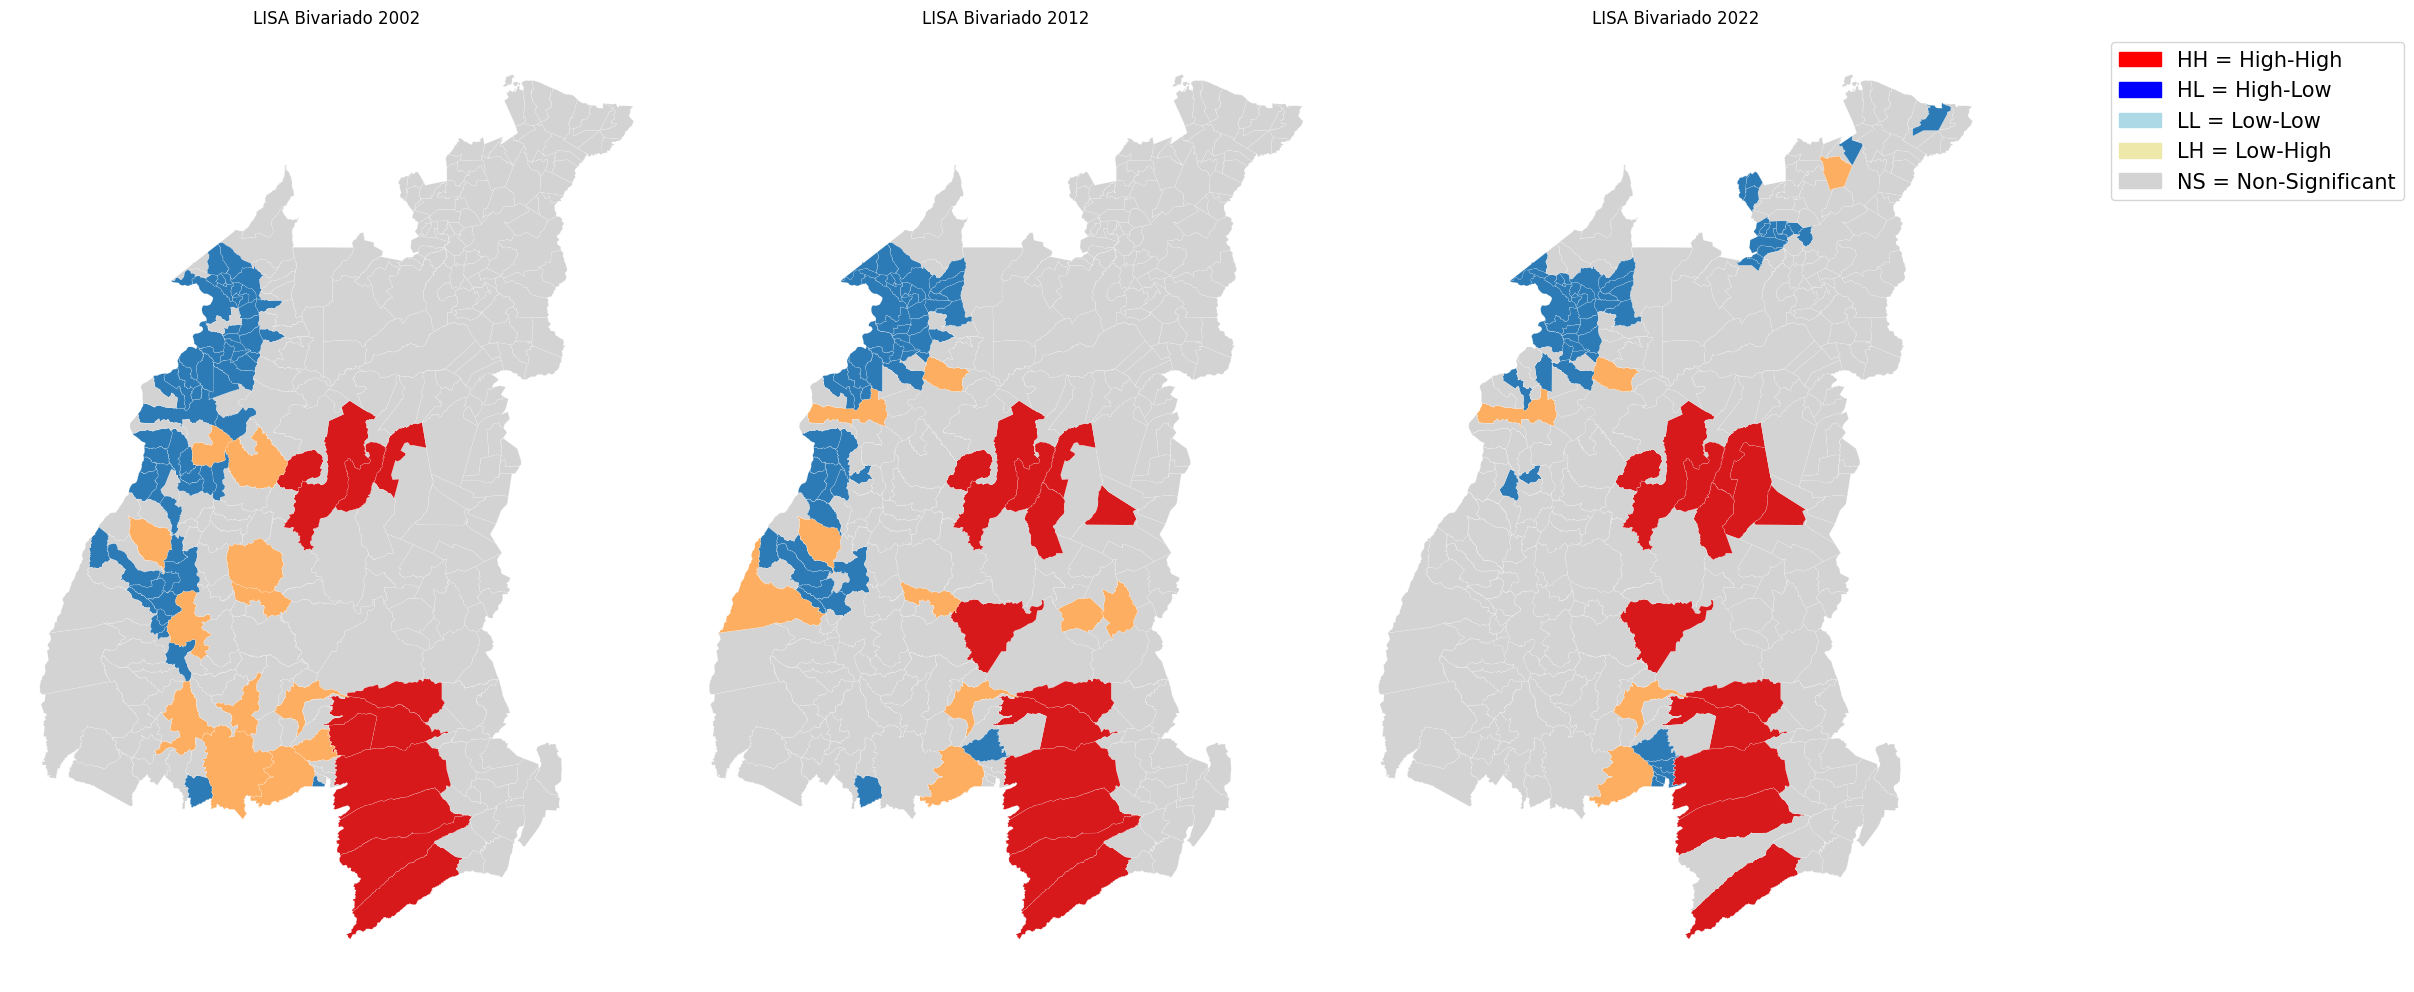

In [100]:
# Criar a matriz de pesos espaciais do tipo KNN com k=4
w = libpysal.weights.KNN.from_dataframe(gdf, k=4)

# Função para calcular e plotar o LISA Bivariado
def plot_bivariate_lisa(ax, year, column1, column2):
    lisa = Moran_Local_BV(gdf[column1], gdf[column2], w)
    lisa_cluster(lisa, gdf, ax=ax, legend=False)
    ax.set_title(f'LISA Bivariado {year}')

# Criar subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 10), constrained_layout=True)

# Plotar mapas LISA bivariados para 2002, 2012 e 2022
plot_bivariate_lisa(axs[0], 2002, 'degradacao_2002', 'Área plantada ou destinada à colheita_2002')
plot_bivariate_lisa(axs[1], 2012, 'degradacao_2012', 'Área plantada ou destinada à colheita_2012')
plot_bivariate_lisa(axs[2], 2022, 'degradacao_2022', 'Área plantada ou destinada à colheita_2022')

# Criar legenda manualmente
import matplotlib.patches as mpatches
hh_patch = mpatches.Patch(color='red', label='HH = High-High')  
hl_patch = mpatches.Patch(color='blue', label='HL = High-Low')  
ll_patch = mpatches.Patch(color='lightblue', label='LL = Low-Low')  
lh_patch = mpatches.Patch(color='palegoldenrod', label='LH = Low-High')  
ns_patch = mpatches.Patch(color='lightgrey', label='NS = Non-Significant')  

plt.legend(handles=[hh_patch, hl_patch, ll_patch, lh_patch, ns_patch], 
           loc='upper left', bbox_to_anchor=(1.15, 1), fontsize=15)

plt.show()

### Degradação Ambiental x Valor da Produção

Bivariate Moran's I for degradacao_2002 and Valor da produção (Mil Reais)_2002: 0.23593418342997036, p-value: 0.001
Bivariate Moran's I for degradacao_2012 and Valor da produção (Mil Reais)_2012: 0.21106892544587708, p-value: 0.001
Bivariate Moran's I for degradacao_2022 and Valor da produção (Mil Reais)_2022: 0.24964090521707566, p-value: 0.001


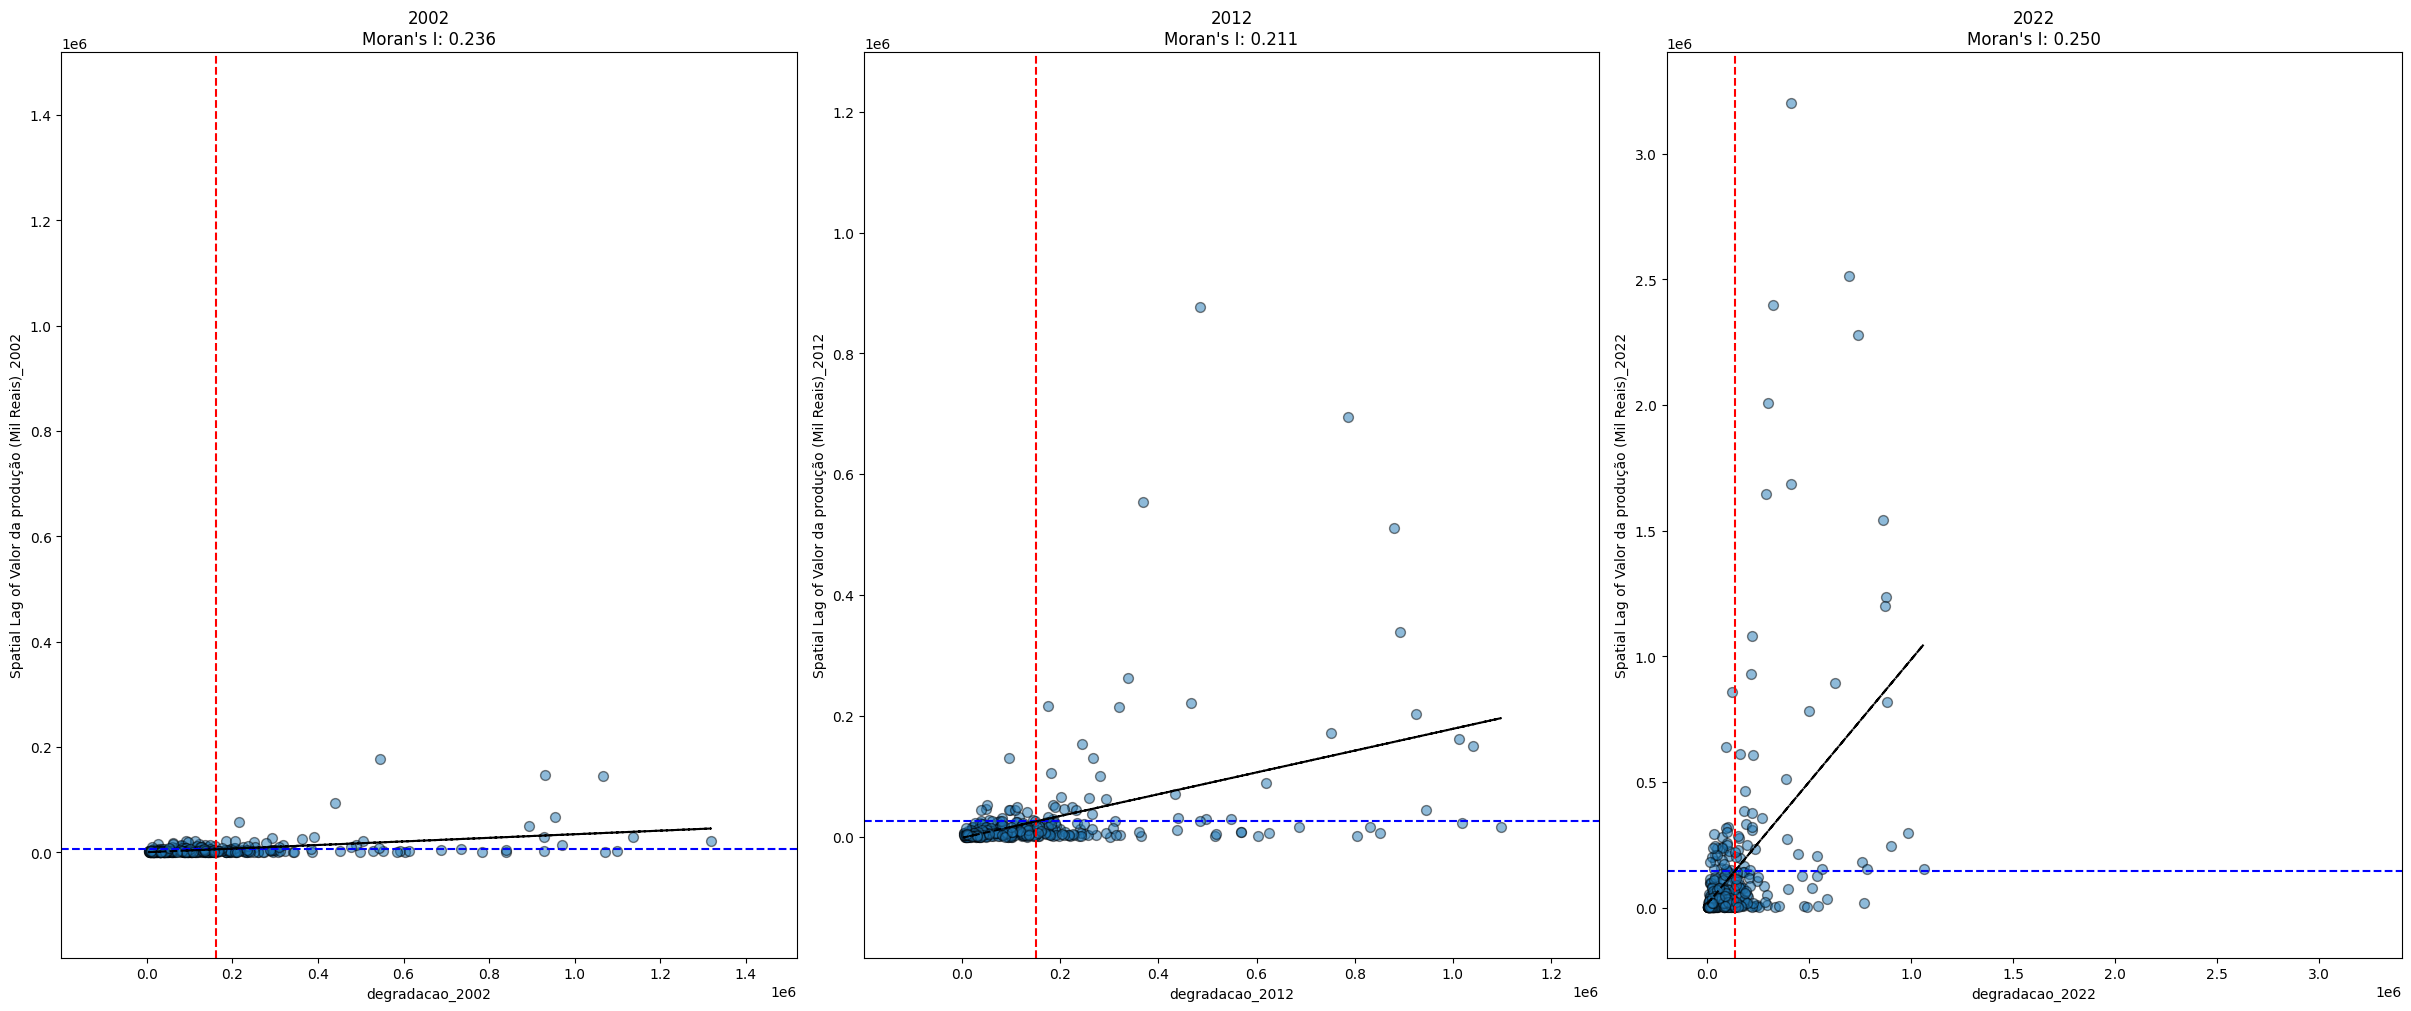

In [103]:
# Criar a matriz de pesos espaciais do tipo KNN com k=4
w = libpysal.weights.KNN.from_dataframe(gdf, k=4)

# Função para calcular e plotar o Índice de Moran Bivariado
def plot_bivariate_moran(ax, year, column1, column2):
    moran_bv = Moran_BV(gdf[column1], gdf[column2], w)
    print(f"Bivariate Moran's I for {column1} and {column2}: {moran_bv.I}, p-value: {moran_bv.p_sim}")

    # Obter valores defasados espacialmente (lag)
    ylag = libpysal.weights.lag_spatial(w, gdf[column2])

    # Gráfico de dispersão
    sc = ax.scatter(gdf[column1], ylag, alpha=0.5, edgecolor='k', s=50)

    # Adicionar linhas horizontais e verticais para distinguir a média observada e a média de Moran's I
    ax.axvline(x=gdf[column1].mean(), color='r', linestyle='--')
    ax.axhline(y=ylag.mean(), color='b', linestyle='--')

    # Ajustar um modelo linear aos dados
    coefficients = np.polyfit(gdf[column1], ylag, 1)
    poly_fit = np.poly1d(coefficients)
    ax.plot(gdf[column1], poly_fit(gdf[column1]), color='black', linestyle='--')

    # Ajustar os limites dos eixos para melhor visualização dos quadrantes
    ax.set_xlim(min(gdf[column1].min(), ylag.min()) - 200000, max(gdf[column1].max(), ylag.max()) + 200000)
    ax.set_ylim(min(gdf[column1].min(), ylag.min()) - 200000, max(gdf[column1].max(), ylag.max()) + 200000)

    # Adicionar títulos e rótulos aos eixos
    ax.set_title(f'{year}\nMoran\'s I: {moran_bv.I:.3f}')
    ax.set_xlabel(column1)
    ax.set_ylabel(f'Spatial Lag of {column2}')

# Criar subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 10), constrained_layout=True)

# Plotar gráficos para 2002, 2012 e 2022
plot_bivariate_moran(axs[0], 2002, 'degradacao_2002', 'Valor da produção (Mil Reais)_2002')
plot_bivariate_moran(axs[1], 2012, 'degradacao_2012', 'Valor da produção (Mil Reais)_2012')
plot_bivariate_moran(axs[2], 2022, 'degradacao_2022', 'Valor da produção (Mil Reais)_2022')

# Mostrar o gráfico
plt.show()

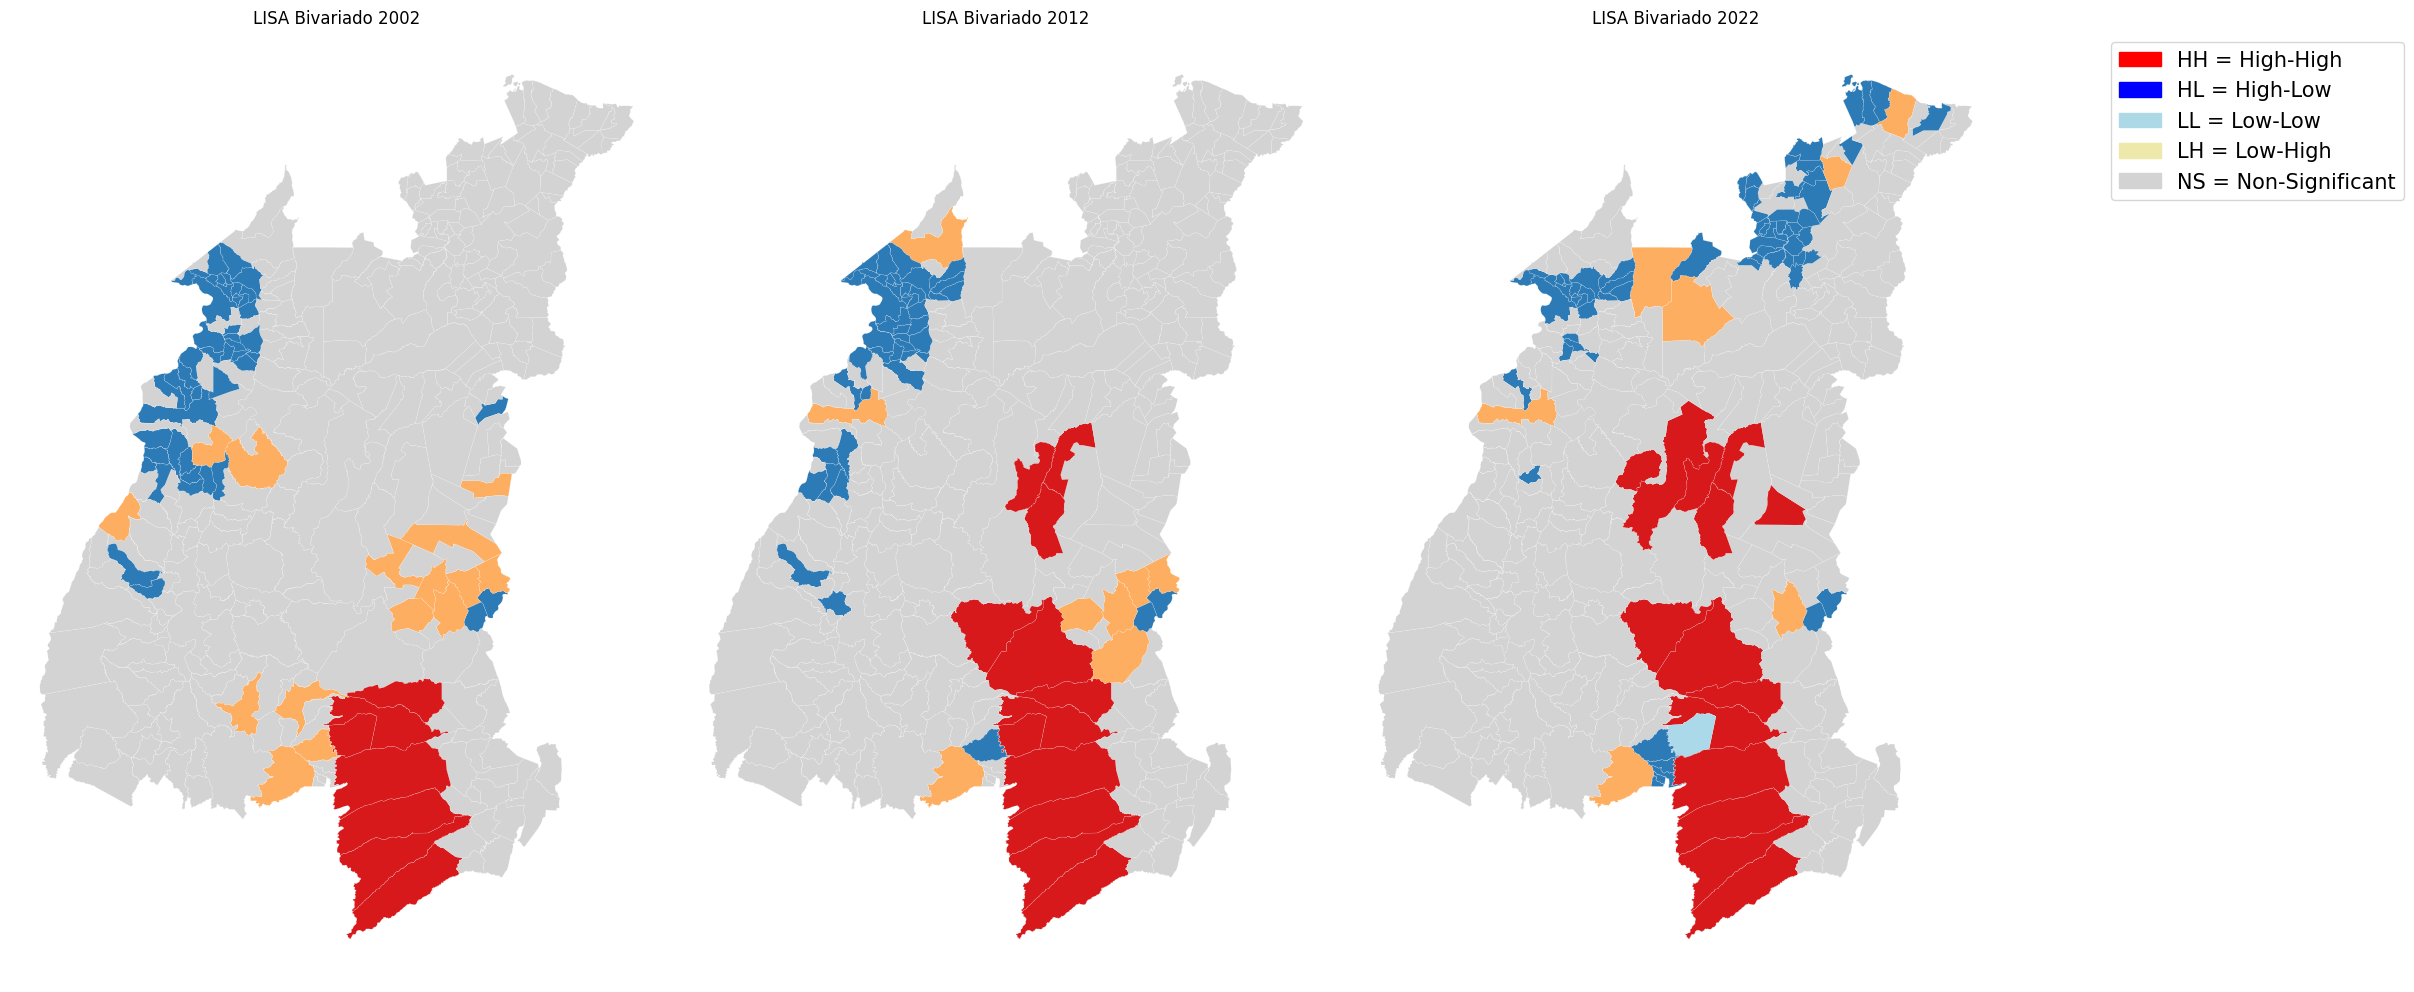

In [104]:
# Criar a matriz de pesos espaciais do tipo KNN com k=4
w = libpysal.weights.KNN.from_dataframe(gdf, k=4)

# Função para calcular e plotar o LISA Bivariado
def plot_bivariate_lisa(ax, year, column1, column2):
    lisa = Moran_Local_BV(gdf[column1], gdf[column2], w)
    lisa_cluster(lisa, gdf, ax=ax, legend=False)
    ax.set_title(f'LISA Bivariado {year}')

# Criar subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 10), constrained_layout=True)

# Plotar mapas LISA bivariados para 2002, 2012 e 2022
plot_bivariate_lisa(axs[0], 2002, 'degradacao_2002', 'Valor da produção (Mil Reais)_2002')
plot_bivariate_lisa(axs[1], 2012, 'degradacao_2012', 'Valor da produção (Mil Reais)_2012')
plot_bivariate_lisa(axs[2], 2022, 'degradacao_2022', 'Valor da produção (Mil Reais)_2022')

# Criar legenda manualmente
import matplotlib.patches as mpatches
hh_patch = mpatches.Patch(color='red', label='HH = High-High')  
hl_patch = mpatches.Patch(color='blue', label='HL = High-Low')  
ll_patch = mpatches.Patch(color='lightblue', label='LL = Low-Low')  
lh_patch = mpatches.Patch(color='palegoldenrod', label='LH = Low-High')  
ns_patch = mpatches.Patch(color='lightgrey', label='NS = Non-Significant')  

plt.legend(handles=[hh_patch, hl_patch, ll_patch, lh_patch, ns_patch], 
           loc='upper left', bbox_to_anchor=(1.15, 1), fontsize=15)

plt.show()